In [1]:
from utils import *
from MySolution import MyClassifier, MyClassifier2, MyClustering, MyLabelSelection
import random

Synthetic data shape:  (1000, 2) (1000,)


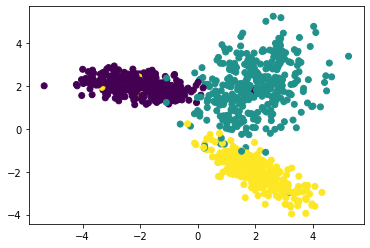

In [2]:
# Get datasets
syn_data = prepare_synthetic_data()
print("Synthetic data shape: ", syn_data['trainX'].shape, syn_data['trainY'].shape)

plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])

MNIST data shape:  (1000, 784) (1000,)


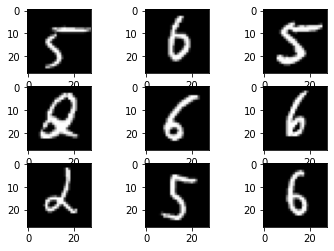

In [3]:
mnist_data = prepare_mnist_data()
print("MNIST data shape: ", mnist_data['trainX'].shape, mnist_data['trainY'].shape)

for i in range(9):	
    plt.subplot(330 + 1 + i)
    plt.imshow(mnist_data['trainX'][i].reshape(28,28), cmap='gray')
plt.show()

In [4]:
mnist_labels = [0] * 10
for i in mnist_data['trainY']:
    mnist_labels[int(i)] += 1
mnist_labels

[0, 0, 333, 0, 0, 303, 364, 0, 0, 0]

## Task1 Supervised Learning

### Test on synthetic data

In [98]:
clf_syn = MyClassifier(3, 100, 0.1)

In [99]:
clf_syn.train(syn_data['trainX'], syn_data['trainY'])

class 0 finished
class 1 finished
class 2 finished


In [100]:
predY_syn = clf_syn.predict(syn_data['testX'])

In [101]:
clf_syn.evaluate(syn_data['testX'], syn_data['testY'])

0.958

In [102]:
print(clf_syn.w)
print(clf_syn.b)

[[-0.73893464  0.4651772 ]
 [ 1.42999015  1.05585632]
 [-0.45410144 -0.95208596]]
[-0.6 -1.6 -0.4]


In [103]:
# Calculate the decision boundaries
hyperplane_slopes = [-1/(vector[1]/vector[0]) for vector in clf_syn.w]
x_values = np.linspace(-3, 3, 30)
y_values = [slope * x_values for slope in hyperplane_slopes]
for i in range(clf_syn.r):
    for j in range(len(y_values[0])):
        y_values[i][j] -= clf_syn.b[i] / clf_syn.w[i][1]

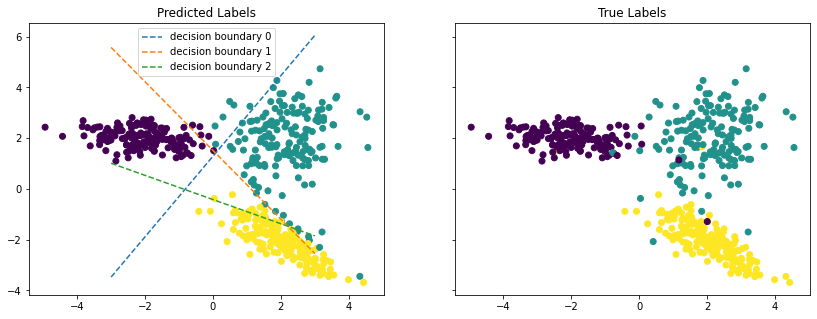

In [104]:
# Plot the results
plt.rcParams['figure.figsize'] = [14, 5]
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.scatter(syn_data['testX'][:, 0], syn_data['testX'][:, 1], c=predY_syn)
ax1.set_title('Predicted Labels')
for i in range(clf_syn.r):
    ax1.plot(x_values, y_values[i], linestyle='--', label='decision boundary {}'.format(i))
ax1.legend()
ax2.scatter(syn_data['testX'][:, 0], syn_data['testX'][:, 1], c=syn_data['testY'])
ax2.set_title('True Labels')
fig.savefig('syn_classifier.png', dpi=600)

### Test on MNIST data

In [120]:
clf_mnist = MyClassifier(3, 10, 0.1)

In [121]:
clf_mnist.train(mnist_data['trainX'], mnist_data['trainY'])

class 0 finished
class 1 finished
class 2 finished


In [122]:
clf_mnist.evaluate(mnist_data['trainX'], mnist_data['trainY'])

0.988

In [123]:
print(clf_mnist.w)
print(clf_mnist.b)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[-2.4  5.  -7.2]


In [124]:
predY = clf_mnist.predict(mnist_data['testX'])
predY[:10]

[2, 6, 5, 5, 6, 6, 5, 2, 2, 2]

## Task 2 Unsupervised Learning

### Test on synthetic data

#### K = 3

In [17]:
model_1 = MyClustering(3)

In [18]:
pred_train_labels = model_1.train(syn_data['trainX'])

In [19]:
centers_x = [x for (x, y) in model_1.centers]
centers_y = [y for (x, y) in model_1.centers]

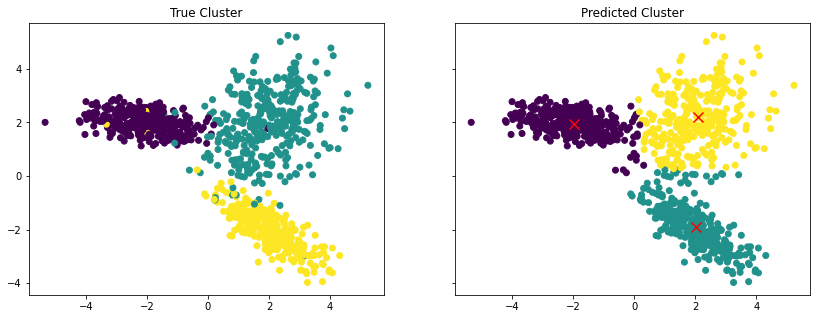

In [20]:
# Plot the results
plt.rcParams['figure.figsize'] = [14, 5]
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])
ax1.set_title('True Cluster')
ax2.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=pred_train_labels)
ax2.scatter(centers_x, centers_y, marker='x', s=100, c='r')
ax2.set_title('Predicted Cluster')
fig.savefig('syn_cluster_3.png', dpi=600)

In [21]:
syn_trainY = np.array(syn_data['trainY'], dtype=np.int64)
syn_testY = np.array(syn_data['testY'], dtype=np.int64)

In [22]:
model_1.evaluate_clustering(syn_trainY)

0.813935258871228

In [23]:
model_1.evaluate_classification(syn_trainY, syn_data['testX'], syn_testY)

0.964

#### K = 5

In [24]:
model_2 = MyClustering(5)

In [25]:
pred_train_labels_2 = model_2.train(syn_data['trainX'])

In [26]:
centers_x2 = [x for (x, y) in model_2.centers]
centers_y2 = [y for (x, y) in model_2.centers]

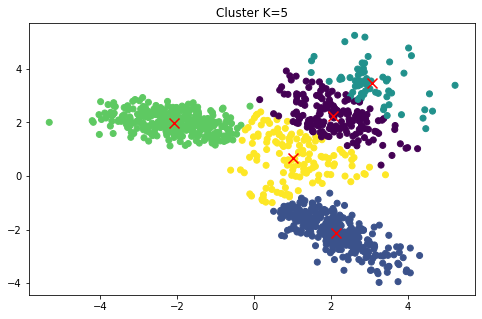

In [27]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=pred_train_labels_2)
plt.scatter(centers_x2, centers_y2, marker='x', s=100, c='r')
plt.title('Cluster K=5')
plt.savefig('syn_cluster_5.png', dpi=600)

In [28]:
model_2.evaluate_clustering(syn_trainY)

0.8316354376509149

In [29]:
model_2.evaluate_classification(syn_trainY, syn_data['testX'], syn_testY)

0.952

#### K = 10

In [30]:
model_3 = MyClustering(10)

In [31]:
pred_train_labels_3 = model_3.train(syn_data['trainX'])

In [32]:
centers_x3 = [x for (x, y) in model_3.centers]
centers_y3 = [y for (x, y) in model_3.centers]

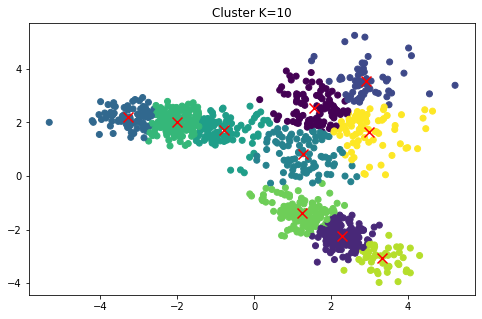

In [33]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=pred_train_labels_3)
plt.scatter(centers_x3, centers_y3, marker='x', s=100, c='r')
plt.title('Cluster K=10')
plt.savefig('syn_cluster_10.png', dpi=600)

In [34]:
model_3.evaluate_clustering(syn_trainY)

0.8493755839113298

In [35]:
model_3.evaluate_classification(syn_trainY, syn_data['testX'], syn_testY)

0.976

### Test on MNIST data

#### K = 3

In [36]:
model_mnist_1 = MyClustering(3)

In [37]:
mnist_pred_labels = model_mnist_1.train(mnist_data['trainX'])

In [38]:
mnist_trainY = np.array(mnist_data['trainY'], dtype=np.int64)
mnist_testY = np.array(mnist_data['testY'], dtype=np.int64)

In [39]:
model_mnist_1.evaluate_clustering(mnist_trainY)

0.3003807397387893

In [40]:
model_mnist_1.evaluate_classification(mnist_trainY, mnist_data['testX'], mnist_testY)

0.498

#### K = 10

In [41]:
model_mnist_2 = MyClustering(10)
mnist_pred_labels2 = model_mnist_2.train(mnist_data['trainX'])

In [42]:
model_mnist_2.evaluate_clustering(mnist_trainY)

0.7185390349621944

In [43]:
model_mnist_2.evaluate_classification(mnist_trainY, mnist_data['testX'], mnist_testY)

0.916

#### K = 32

In [44]:
model_mnist_3 = MyClustering(32)
mnist_pred_labels3 = model_mnist_3.train(mnist_data['trainX'])

In [45]:
model_mnist_3.evaluate_clustering(mnist_trainY)

0.8626986618711616

In [46]:
model_mnist_3.evaluate_classification(mnist_trainY, mnist_data['testX'], mnist_testY)

0.952

## Task 3

### Label selection on the synthetic data

In [47]:
ratio = 0.1
selector = MyLabelSelection(ratio, 3)

In [48]:
selected_labels = selector.select(syn_data['trainX'])

In [49]:
selected_trainX = np.array([syn_data['trainX'][int(i)] for i in selected_labels])
selected_trainY = np.array([syn_data['trainY'][int(i)] for i in selected_labels])

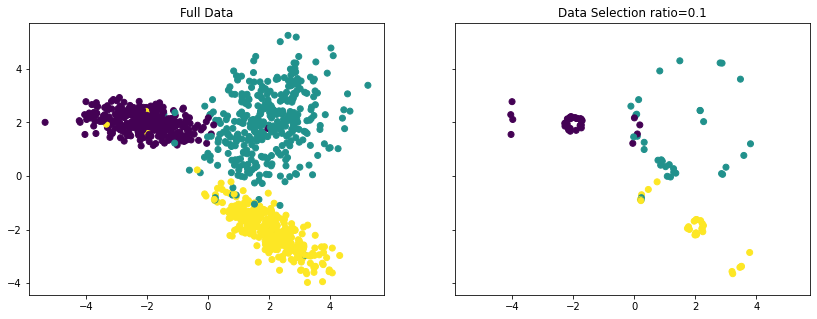

In [50]:
plt.rcParams['figure.figsize'] = [14, 5]
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])
ax1.set_title('Full Data')
ax2.scatter(selected_trainX[:, 0], selected_trainX[:, 1], c=selected_trainY)
ax2.set_title('Data Selection ratio={}'.format(ratio))
fig.savefig('Data Selection ratio={}.png'.format(ratio), dpi=600)

In [51]:
clf_selected = MyClassifier(3, 100, 0.01)

In [52]:
clf_selected.train(selected_trainX, selected_trainY)

class 0 finished
class 1 finished
class 2 finished


In [53]:
clf_selected.evaluate(syn_data['testX'], syn_data['testY'])

0.96

### Random selection on the synthetic data

In [139]:
ratio = 0.1
number_selected = int(1000 * ratio)
random_labels_syn = random.sample(range(1000), number_selected)
selected_syn_trainX_rand = np.array([syn_data['trainX'][int(i)] for i in random_labels_syn])
selected_syn_trainY_rand = np.array([syn_data['trainY'][int(i)] for i in random_labels_syn])
print(selected_syn_trainX_rand.shape, selected_syn_trainY_rand.shape)

(100, 2) (100,)


In [140]:
clf_selected_syn_rand = MyClassifier(3, 100, 0.01)

In [141]:
clf_selected_syn_rand.train(selected_syn_trainX_rand, selected_syn_trainY_rand)

class 0 finished
class 1 finished
class 2 finished


In [142]:
clf_selected_syn_rand.evaluate(syn_data['testX'], syn_data['testY'])

0.96

Text(0.5, 1.0, 'Random Selection, ratio=0.1')

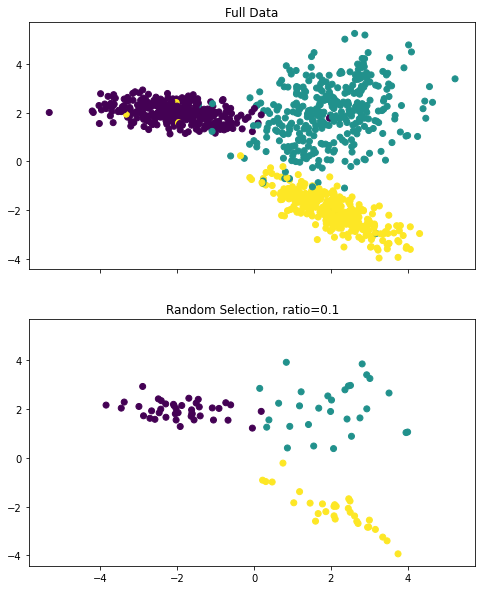

In [158]:
plt.rcParams['figure.figsize'] = [8, 10]
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
ax1.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])
ax1.set_title('Full Data')
ax2.scatter(selected_syn_trainX_rand[:, 0], selected_syn_trainX_rand[:, 1], c=selected_syn_trainY_rand)
ax2.set_title('Random Selection, ratio={}'.format(ratio))

### Label selection on the MNIST data set

In [125]:
ratio = 1
selector_mnist = MyLabelSelection(ratio, 32)

In [126]:
selected_labels_mnist = selector_mnist.select(mnist_data['trainX'])

In [127]:
selected_trainX_mnist = np.array([mnist_data['trainX'][int(i)] for i in selected_labels_mnist])
selected_trainY_mnist = np.array([mnist_data['trainY'][int(i)] for i in selected_labels_mnist])

In [128]:
clf_selected_mnist = MyClassifier(3, 100, 0.1)

In [129]:
clf_selected_mnist.train(selected_trainX_mnist, selected_trainY_mnist)

class 0 finished
class 1 finished
class 2 finished


In [130]:
clf_selected_mnist.evaluate(mnist_data['testX'], mnist_data['testY'])

0.934

In [131]:
print(selected_trainX_mnist.shape, selected_trainY_mnist.shape)

(1000, 784) (1000,)


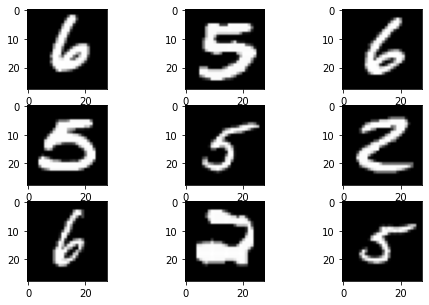

In [132]:
plt.rcParams['figure.figsize'] = [8, 5]
for i in range(9):	
    plt.subplot(330 + 1 + i)
    plt.imshow(mnist_data['trainX'][selected_labels_mnist[i]].reshape(28,28), cmap='gray')
plt.show()

### Random selection on the MNIST data set

In [68]:
ratio = 0.1
number_selected = int(1000 * ratio)
random_labels = random.sample(range(1000), number_selected)
# random_labels = list(range(1000))
# random.shuffle(random_labels)

In [69]:
selected_trainX_rand = np.array([mnist_data['trainX'][int(i)] for i in random_labels])
selected_trainY_rand = np.array([mnist_data['trainY'][int(i)] for i in random_labels])

In [70]:
print(selected_trainX_rand.shape, selected_trainY_rand.shape)

(100, 784) (100,)


In [71]:
clf_selected_rand = MyClassifier(3, 100, 0.01)

In [72]:
clf_selected_rand.train(selected_trainX_rand, selected_trainY_rand)

class 0 finished
class 1 finished
class 2 finished


In [73]:
clf_selected_rand.evaluate(mnist_data['testX'], mnist_data['testY'])

0.9

## Task 4 Discussion

In [74]:
ratio = 0.05
number_selected = int(1000 * ratio)
random_labels = random.sample(range(1000), number_selected)

In [75]:
rand_trainX = np.array([mnist_data['trainX'][int(i)] for i in random_labels])
rand_trainY = np.array([mnist_data['trainY'][int(i)] for i in random_labels], dtype=np.int64)
print(rand_trainX.shape, rand_trainY.shape)

(50, 784) (50,)


In [76]:
model_mnist_randX = MyClustering(10)
mnist_predY_randX = model_mnist_randX.train(rand_trainX)

In [77]:
model_mnist_randX.evaluate_clustering(rand_trainY)

0.41307247568904953

In [78]:
model_mnist_randX.evaluate_classification(rand_trainY, mnist_data['testX'], mnist_testY)

0.728

In [79]:
rand_trainX = np.array([syn_data['trainX'][int(i)] for i in random_labels])
rand_trainY = np.array([syn_data['trainY'][int(i)] for i in random_labels], dtype=np.int64)
print(rand_trainX.shape, rand_trainY.shape)

(50, 2) (50,)


In [80]:
model_mnist_randX = MyClustering(5)
mnist_predY_randX = model_mnist_randX.train(rand_trainX)

In [81]:
model_mnist_randX.evaluate_clustering(rand_trainY)

1.0

In [82]:
model_mnist_randX.evaluate_classification(rand_trainY, syn_data['testX'], syn_testY)

0.97

## Plot

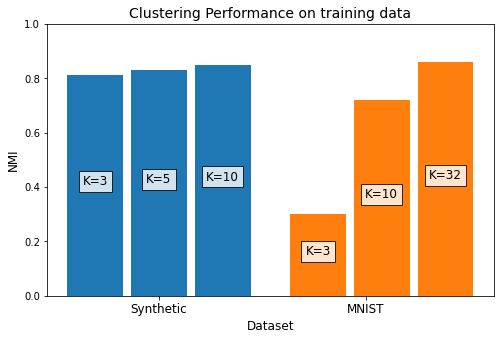

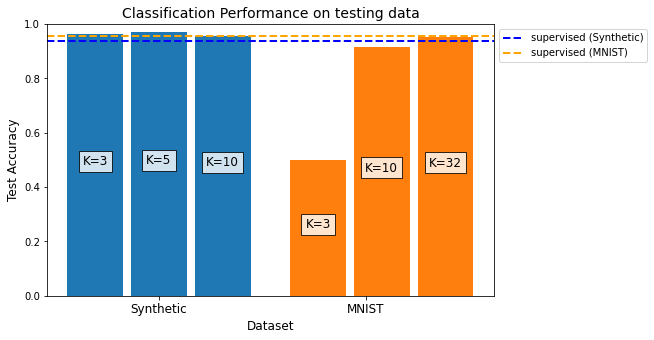

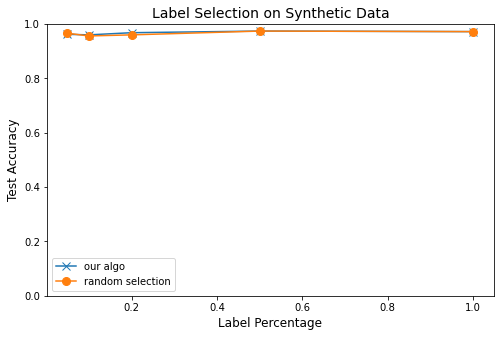

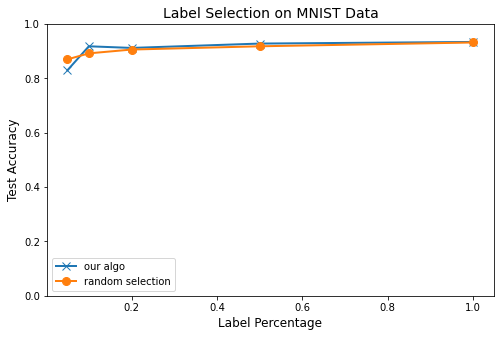

In [153]:
## TODO: Implement your solution and store the results in the following dictionaries
## Please note that the below values are given as an example to show the format, 
## you need to replace them with your values :)
plt.rcParams['figure.figsize'] = [8, 5]

result1 = {'synthetic_test_accuracy':0.938, 'mnist_test_accuracy':0.956}

result2 = {'synthetic':{'K':[3, 5, 10], 'clustering_nmi':[0.814,0.832,0.849], 'classification_accuracy':[0.964,0.972,0.956]},
            'mnist':{'K':[3, 10, 32], 'clustering_nmi':[0.300,0.719,0.862], 'classification_accuracy':[0.498,0.916,0.952]}}
                                
result3 = {'synthetic': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.962,0.960,0.968,0.974,0.972], 'test_accuracy(random)':[0.966,0.956,0.960,0.974,0.972]},
            'mnist': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.830,0.918,0.912,0.928,0.934], 'test_accuracy(random)':[0.870,0.892,0.906,0.918,0.932]}}


plot_result(result1, result2, result3)

In [157]:
# plt.rcParams["image.cmap"] = 'viridis'